In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading in the CSV and dropping the NaN values ###

In [43]:
###Read in data csv file and choose which columns we want to be included###
evict = pd.read_csv("data/Eviction_Notices.csv", engine='python', on_bad_lines='skip')
    
bad_reasons = evict[['Eviction ID', 'File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 'Failure to Sign Renewal']].dropna()
bad_reasons

,Eviction ID,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
0,M222138,12/12/2022,False,True,False,False,False,False,False,False
1,M211838,12/06/2021,False,True,False,False,False,False,False,False
2,M222033,11/14/2022,False,False,False,False,False,False,False,False
3,M221840,10/18/2022,False,False,False,False,False,False,False,False
4,M120930,06/21/2012,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
158041,M020356,03/25/2002,False,False,False,False,False,False,False,False
158042,M101330,09/24/2010,False,False,False,False,False,False,False,False
158043,M070731,04/25/2007,False,False,False,False,False,True,False,False
158044,M061330,08/09/2006,False,False,False,False,False,False,False,False


In [44]:
for col in evict.columns:
    print(col)

Eviction ID
Address
City
State
Eviction Notice Source Zipcode
File Date
Non Payment
Breach
Nuisance
Illegal Use
Failure to Sign Renewal
Access Denial
Unapproved Subtenant
Owner Move In
Demolition
Capital Improvement
Substantial Rehab
Ellis Act WithDrawal
Condo Conversion
Roommate Same Unit
Other Cause
Late Payments
Lead Remediation
Development
Good Samaritan Ends
Constraints Date
Supervisor District
Neighborhoods - Analysis Boundaries
Location
Shape
SF Find Neighborhoods
Current Police Districts
Current Supervisor Districts
Analysis Neighborhoods
DELETE - Neighborhoods
DELETE - Police Districts
DELETE - Supervisor Districts
DELETE - Fire Prevention Districts
DELETE - Zip Codes
CBD, BID and GBD Boundaries as of 2017
Central Market/Tenderloin Boundary
Areas of Vulnerability, 2016
Central Market/Tenderloin Boundary Polygon - Updated
Fix It Zones as of 2018-02-07
Neighborhoods


In [46]:
###same as last cell, just include which neighborhoods they were in. however, some neighborhoods were NaN so we dropped those values and got a different graph###

bad_reasons_with_neighborhood = evict[['Eviction ID', 'Address','File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 'Failure to Sign Renewal', 'Neighborhoods - Analysis Boundaries']].dropna()

sampled = bad_reasons_with_neighborhood.sample(5000).rename({'Neighborhoods - Analysis Boundaries': 'Neighborhoods'}, axis=1)
sampled.head(20)

,Eviction ID,Address,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal,Neighborhoods
114044,M111824,1600 Block Of Noe Street,11/03/2011,False,True,False,False,False,False,False,False,Noe Valley
130374,E982775,1100 Block Of Masonic Avenue,12/01/1998,False,True,False,False,False,False,False,False,Haight Ashbury
28292,M020638,2800 Block Of Filbert Street,05/20/2002,False,False,False,False,False,False,False,False,Marina
99547,M130256,0 Block Of Ervine Street,02/14/2013,False,True,False,False,False,False,False,False,Visitacion Valley
56463,M211264,0 Block Of Minerva Street,09/10/2021,True,False,False,False,False,False,False,False,Oceanview/Merced/Ingleside
46412,M201470,0 Block Of 06th Street,10/22/2020,False,True,False,False,False,False,False,False,South of Market
96881,M221515,1200 Block Of Funston Avenue,09/19/2022,True,False,False,False,False,False,False,False,Inner Sunset
76601,M2K2265,1300 Block Of Mcallister Street,11/08/2000,False,False,False,False,False,False,False,False,Western Addition
13179,M121369,1100 Block Of Market Street,08/16/2012,False,False,False,False,False,False,False,False,South of Market
131948,E982552,400 Block Of Dolores Street,11/03/1998,False,False,False,False,False,False,False,False,Castro/Upper Market


In [47]:
neighborhood_counts = sampled[['Neighborhoods']].value_counts().reset_index(name='counts')
neighborhood_counts.describe()

,counts
count,41.000000
mean,121.951220
std,108.408245
min,1.000000
25%,44.000000
50%,108.000000
75%,157.000000
max,552.000000


<AxesSubplot: xlabel='Neighborhoods'>

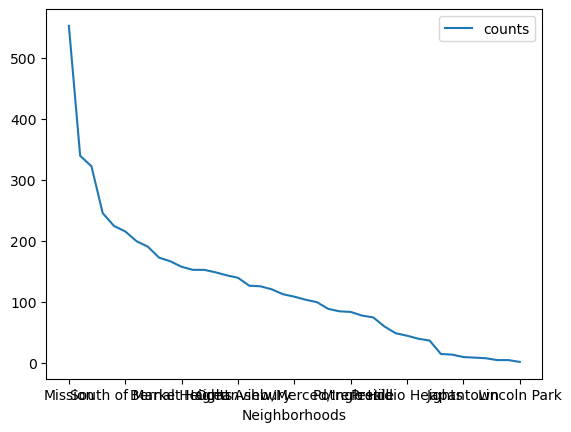

In [48]:
###plot evictions per neighborhood###
neighborhood_counts.plot('Neighborhoods', 'counts')

<BarContainer object of 41 artists>

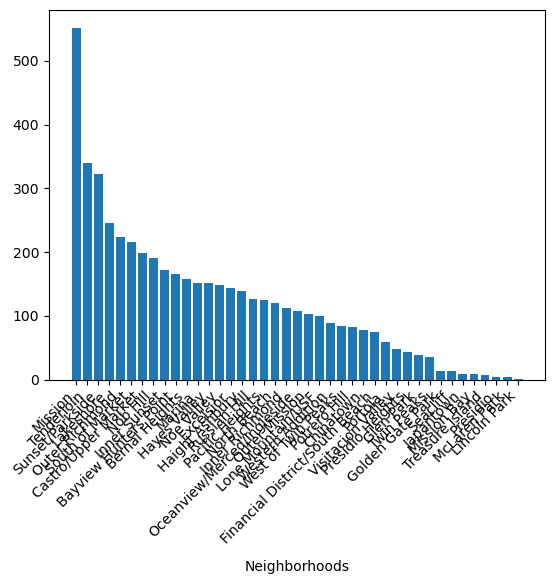

In [49]:
neighs = list(neighborhood_counts["Neighborhoods"])
counts = list(neighborhood_counts["counts"])
fig, ax = plt.subplots()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Neighborhoods", labelpad = 10)
plt.bar(neighs, counts)


In [50]:
nuisances = sampled[['Nuisance']]

In [51]:
reasons = sampled.iloc[:, 3:11]
reasons

,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
114044,False,True,False,False,False,False,False,False
130374,False,True,False,False,False,False,False,False
28292,False,False,False,False,False,False,False,False
99547,False,True,False,False,False,False,False,False
56463,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
144959,False,False,False,False,False,False,False,False
22410,False,False,False,False,True,False,False,False
50405,False,True,False,False,False,False,False,False
136823,False,False,False,False,False,False,False,False


   Non Payment  counts
0        False    4668
1         True     332
   Nuisance  counts
0     False    4058
1      True     942
   Illegal Use  counts
0        False    4902
1         True      98
   Unapproved Subtenant  counts
0                 False    4910
1                  True      90
   Demolition  counts
0       False    4843
1        True     157
   Ellis Act WithDrawal  counts
0                 False    4512
1                  True     488
   Late Payments  counts
0          False    4800
1           True     200
   Failure to Sign Renewal  counts
0                    False    4991
1                     True       9
9


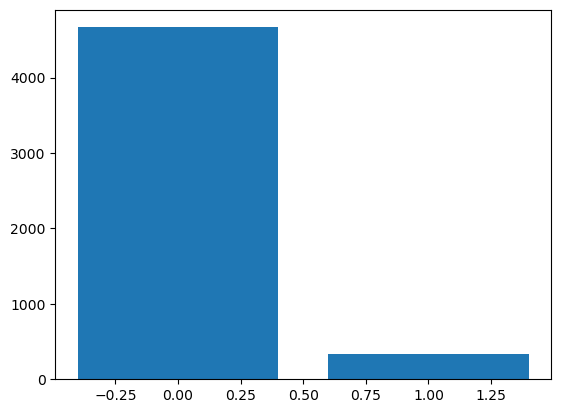

In [52]:
for col in reasons.columns:
    print(sampled[[col]].value_counts().reset_index(name='counts'))

###plot true and false for one column###
payment_ocurr = reasons[['Non Payment']].value_counts().reset_index(name='counts')
payment_ocurr

pay_bool = list(payment_ocurr['Non Payment'])
pay_counts = list(payment_ocurr['counts'])
plt.bar(pay_bool, pay_counts)

#create dataframe with true and false occurrences, maybe make this one of the tests#
columnNames = reasons.columns

for i in reasons.columns:
    true_occurrences = reasons[i].sum()
    false_occurrences = len(reasons) - true_occurrences

data = {"True": true_occurrences, "False": false_occurrences}
combined = pd.DataFrame(data, columnNames)
print(true_occurrences)

In [112]:
###another method to find number of true and false occurrences per reason###
columnNames = reasons.columns
trues_oc = {}

for i in reasons.columns:
    trues_oc[i] = reasons[i].sum()

print(trues_oc)

argh = pd.DataFrame(trues_oc, ['True'], columnNames)
argh

{'Non Payment': 332, 'Nuisance': 942, 'Illegal Use': 98, 'Unapproved Subtenant': 90, 'Demolition': 157, 'Ellis Act WithDrawal': 488, 'Late Payments': 200, 'Failure to Sign Renewal': 9}


,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
True,332,942,98,90,157,488,200,9
